In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BostonHousing 2.csv')

df.shape



(506, 14)

In [418]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [419]:
df.value_counts()

crim      zn    indus  chas  nox    rm     age    dis      rad  tax  ptratio  b       lstat  medv
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900   1    296  15.3     396.90  4.98   24.0    1
1.13081   0.0   8.14   0     0.538  5.713  94.1   4.2330   4    307  21.0     360.17  22.60  12.7    1
1.46336   0.0   19.58  0     0.605  7.489  90.8   1.9709   5    403  14.7     374.43  1.73   50.0    1
1.42502   0.0   19.58  0     0.871  6.510  100.0  1.7659   5    403  14.7     364.31  7.39   23.3    1
1.41385   0.0   19.58  1     0.871  6.129  96.0   1.7494   5    403  14.7     321.02  15.12  17.0    1
                                                                                                    ..
0.10959   0.0   11.93  0     0.573  6.794  89.3   2.3889   1    273  21.0     393.45  6.48   22.0    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5    384  20.9     393.49  13.00  21.7    1
0.10659   80.0  1.91   0     0.413  5.936  19.5   10.5857  4    334  22.0     

In [420]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [421]:
df.duplicated().sum()

np.int64(0)

In [422]:
print(df.isnull().sum() / len(df) * 100) 
df = df.dropna()# в процентах

crim       0.000000
zn         0.000000
indus      0.000000
chas       0.000000
nox        0.000000
rm         0.988142
age        0.000000
dis        0.000000
rad        0.000000
tax        0.000000
ptratio    0.000000
b          0.000000
lstat      0.000000
medv       0.000000
dtype: float64


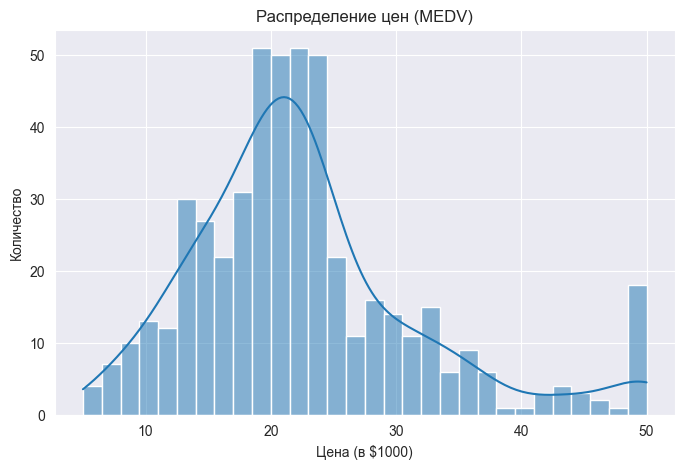

In [423]:
plt.figure(figsize=(8,5))
sns.histplot(df["medv"], bins=30, kde=True)
plt.title("Распределение цен (MEDV)")
plt.xlabel("Цена (в $1000)")
plt.ylabel("Количество")
plt.show()


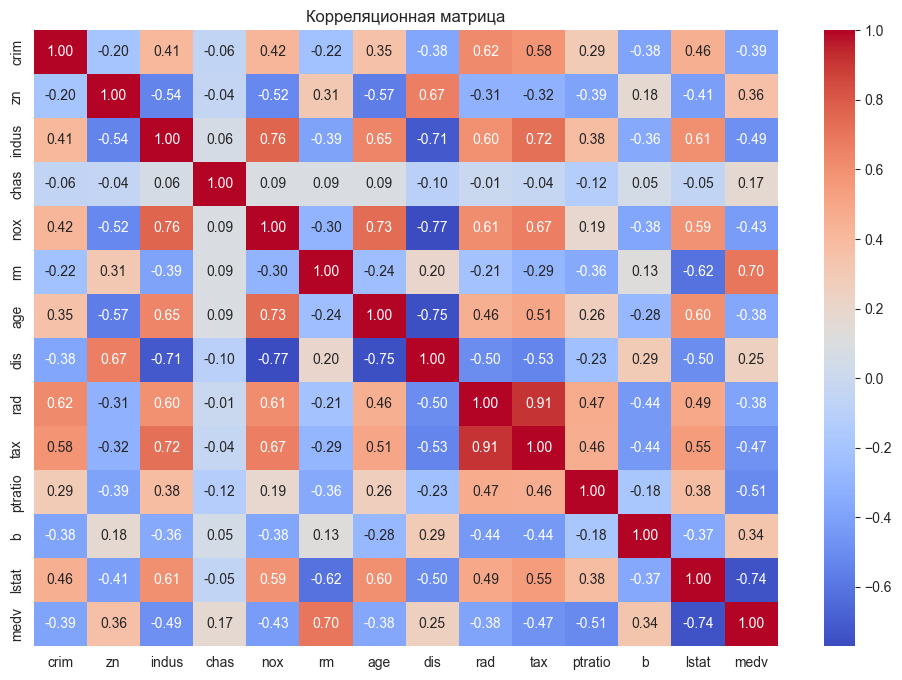

In [424]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


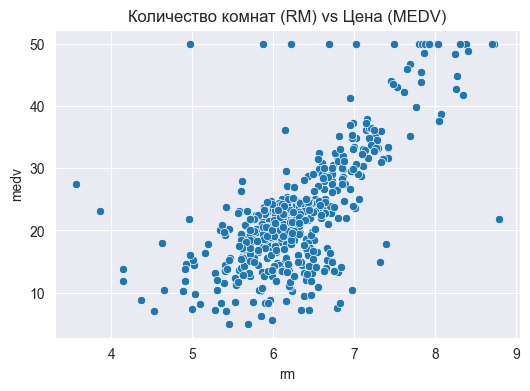

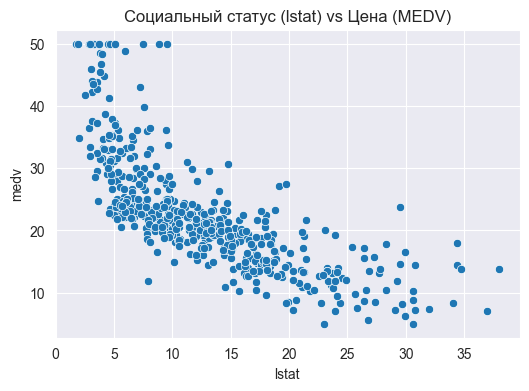

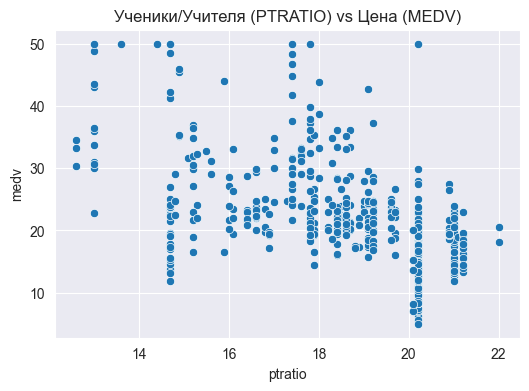

In [425]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["rm"], y=df["medv"])
plt.title("Количество комнат (RM) vs Цена (MEDV)")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df["lstat"], y=df["medv"])
plt.title("Социальный статус (lstat) vs Цена (MEDV)")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df["ptratio"], y=df["medv"])
plt.title("Ученики/Учителя (PTRATIO) vs Цена (MEDV)")
plt.show()



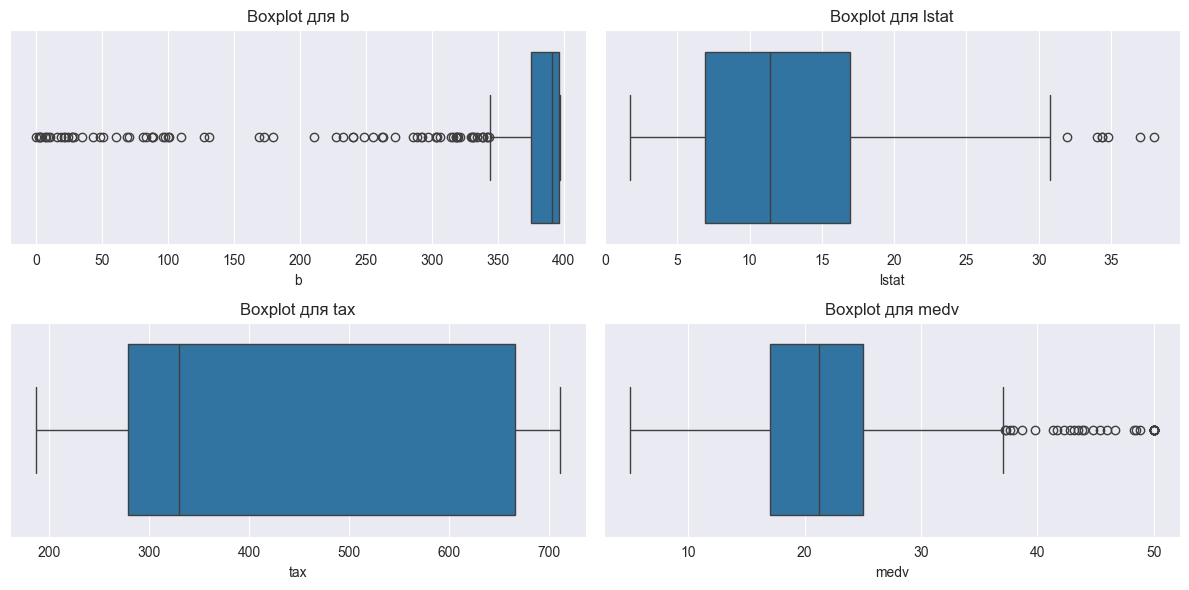

In [426]:
plt.figure(figsize=(12,6))
for i, col in enumerate(["b", "lstat", "tax", 'medv']):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot для {col}")
plt.tight_layout()
plt.show()


In [427]:
w = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b = 0
X = []  # признаки
y = []  # таргет
learning_rate = 0.0001

for index, row in df.head(400).iterrows():
    X.append(row[:-1].tolist())  # все признаки
    y.append(row[-1])         

/var/folders/fv/fkgvl7hn62s6x3tj0f869w680000gn/T/ipykernel_80539/1891570425.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(row[-1])


In [428]:
# X - список списков признаков, y - список целевых значений
# Берём первые m строк (например, 400)
m = len(X)
n = len(X[0])  # количество признаков
train_means = []
train_stds = []

for j in range(n):
    col = [X[i][j] for i in range(m)]
    mean = sum(col) / m
    std = (sum((val - mean)**2 for val in col) / m)**0.5
    train_means.append(mean)
    train_stds.append(std)
    for i in range(m):
        X[i][j] = (X[i][j] - mean) / std


In [429]:
def prediction_y(X, w, b):
    return sum(w[j] * X[j] for j in range(len(X))) + b

In [430]:
def change_w(w, X, y, b, learning_rate):
    m = len(X)
    new_w = []
    for i in range(len(w)):
        d_w_i = (sum((prediction_y(X[j], w, b) - y[j]) * X[j][i] for j in range(m)) * 2 / m)
        new_w.append(w[i] - learning_rate * d_w_i)
    return new_w

def change_b(w, X, y, b, learning_rate):
    m = len(X)
    d_b = (sum((prediction_y(X[j], w, b) - y[j]) for j in range(m)) * 2 / m)
    return b - learning_rate * d_b


In [431]:
def train(X, y, w, b, learning_rate=0.1, epochs=5000):
    m = len(X)
    for epoch in range(epochs):
        # Вычисляем среднеквадратичную ошибку (MSE)
        MSE = sum((prediction_y(X[i], w, b) - y[i]) ** 2 for i in range(m)) / m

        # Печатаем каждые 100 эпох
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, MSE = {MSE:.4f}")

        # Обновляем веса и смещение
        w = change_w(w, X, y, b, learning_rate)
        b = change_b(w, X, y, b, learning_rate)

    return w, b

w, b = train(X, y, w, b)

Epoch 0, MSE = 671.9198
Epoch 100, MSE = 22.9401
Epoch 200, MSE = 22.9101
Epoch 300, MSE = 22.9094
Epoch 400, MSE = 22.9093
Epoch 500, MSE = 22.9093
Epoch 600, MSE = 22.9093
Epoch 700, MSE = 22.9093
Epoch 800, MSE = 22.9093
Epoch 900, MSE = 22.9093
Epoch 1000, MSE = 22.9093
Epoch 1100, MSE = 22.9093
Epoch 1200, MSE = 22.9093
Epoch 1300, MSE = 22.9093
Epoch 1400, MSE = 22.9093
Epoch 1500, MSE = 22.9093
Epoch 1600, MSE = 22.9093
Epoch 1700, MSE = 22.9093
Epoch 1800, MSE = 22.9093
Epoch 1900, MSE = 22.9093
Epoch 2000, MSE = 22.9093
Epoch 2100, MSE = 22.9093
Epoch 2200, MSE = 22.9093
Epoch 2300, MSE = 22.9093
Epoch 2400, MSE = 22.9093
Epoch 2500, MSE = 22.9093
Epoch 2600, MSE = 22.9093
Epoch 2700, MSE = 22.9093
Epoch 2800, MSE = 22.9093
Epoch 2900, MSE = 22.9093
Epoch 3000, MSE = 22.9093
Epoch 3100, MSE = 22.9093
Epoch 3200, MSE = 22.9093
Epoch 3300, MSE = 22.9093
Epoch 3400, MSE = 22.9093
Epoch 3500, MSE = 22.9093
Epoch 3600, MSE = 22.9093
Epoch 3700, MSE = 22.9093
Epoch 3800, MSE = 22.90

In [432]:
# Формируем X_test и y_test
print(w)

X_test = []
y_test = []

for index, row in df[400:].iterrows():
    X_test.append(row[:-1].tolist())  # все признаки кроме таргета
    y_test.append(row[-1])            # таргет


[np.float64(-1.2768111120304377), np.float64(1.0961344876870922), np.float64(0.30715200232743667), np.float64(0.5286881794628909), np.float64(-1.7473346691094154), np.float64(3.4818687527570304), np.float64(0.11610202955403959), np.float64(-2.8299861228860377), np.float64(3.031501973784567), np.float64(-2.065338064496812), np.float64(-1.827479415380403), np.float64(-0.08162036273960115), np.float64(-3.6416256877994355)]


/var/folders/fv/fkgvl7hn62s6x3tj0f869w680000gn/T/ipykernel_80539/2313221298.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test.append(row[-1])            # таргет


In [433]:
for j in range(n):
    for i in range(len(X_test)):
        X_test[i][j] = (X_test[i][j] - train_means[j]) / train_stds[j]

In [434]:
print("Реальное | Предсказанное")
for i in range(len(X_test)):
    y_pred_i = prediction_y(X_test[i], w, b)
    print(f"{y_test[i]:8.2f} | {y_pred_i:12.2f}")


Реальное | Предсказанное
    5.00 |         4.24
   11.90 |         6.81
   27.90 |        21.36
   17.20 |        15.47
   27.50 |        23.72
   15.00 |        16.92
   17.20 |        22.32
   17.90 |         4.79
   16.30 |        12.53
    7.00 |        -4.07
    7.20 |        14.70
    7.50 |        19.49
   10.40 |         9.09
    8.80 |         6.15
    8.40 |        20.44
   16.70 |        22.18
   14.20 |        20.65
   20.80 |        20.33
   13.40 |        19.07
   11.70 |        19.77
    8.30 |        14.98
   10.20 |        21.17
   10.90 |        17.38
   11.00 |        19.28
    9.50 |        18.53
   14.50 |        23.20
   14.10 |        24.10
   16.10 |        26.67
   14.30 |        22.61
   11.70 |        20.61
   13.40 |        18.55
    9.60 |        20.20
    8.70 |        14.32
    8.40 |         9.52
   12.80 |        14.17
   10.50 |        12.96
   17.10 |        19.29
   18.40 |        20.82
   15.40 |        20.10
   10.80 |        14.32
   11.80 |     

In [435]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X, y)

print("Коэффициенты sklearn:", model.coef_)
print("Свободный член sklearn:", model.intercept_)
print("Мои расчеты весов:", w)
print("Свободный член:", b)

Коэффициенты sklearn: [-1.27681111  1.09613449  0.307152    0.52868818 -1.74733467  3.48186875
  0.11610203 -2.82998612  3.03150197 -2.06533806 -1.82747942 -0.08162036
 -3.64162569]
Свободный член sklearn: 24.19275
Мои расчеты весов: [np.float64(-1.2768111120304377), np.float64(1.0961344876870922), np.float64(0.30715200232743667), np.float64(0.5286881794628909), np.float64(-1.7473346691094154), np.float64(3.4818687527570304), np.float64(0.11610202955403959), np.float64(-2.8299861228860377), np.float64(3.031501973784567), np.float64(-2.065338064496812), np.float64(-1.827479415380403), np.float64(-0.08162036273960115), np.float64(-3.6416256877994355)]
Свободный член: 24.192749999999993


# Отчёт по лабораторной работе: Линейная регрессия через градиентный спуск

## 1. Цель работы
- Реализовать алгоритм линейной регрессии без использования сторонних библиотек.  
- Обучить модель на части датасета Boston Housing (первые 400 строк).  
- Проверить работу модели на оставшихся тестовых данных.  
- Определить наиболее значимые признаки, влияющие на целевую переменную.  

## 2. Исходные данные
- Датасет: **Boston Housing**  
- Целевая переменная: `medv` — медианная стоимость жилья.  
- Признаки: 13 числовых переменных (например, `crim`, `zn`, `indus`, …).  
- Обучающая выборка: первые 400 строк.  
- Тестовая выборка: оставшиеся строки.  

## 3. Алгоритм решения

### 3.1 Нормализация признаков
Для ускорения сходимости градиентного спуска все признаки были нормализованы:

\[
X'_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
\]

- \(\mu_j\) — среднее значение j-го признака на обучающей выборке  
- \(\sigma_j\) — стандартное отклонение j-го признака на обучающей выборке  

> Важно: тестовые данные нормализуются по **тем же** средним и стандартному отклонению, что и обучающие.

### 3.2 Градиентный спуск
Функция ошибки (MSE):

\[
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
\]

Где \(\hat{y}_i = w \cdot x_i + b\) — предсказанное значение.  

Обновление параметров:

\[
w_j := w_j - \alpha \frac{\partial J}{\partial w_j}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
\]

- \(\alpha\) — скорость обучения (learning rate)  
- Количество эпох: 5000  

### 3.3 Реализация на Python
- Обучение модели:

```python
w, b = train(X_train, y_train, w, b, learning_rate=0.001, epochs=5000)
